# ЗАДАНИЕ 1(0..8 баллов): Graph500 на ноутбуке

<b>Характеристики машины</b>, на которой выполнено задание:
<li><b>CPU</b>: Core i5-5300U, 2 Cores: 2.7 GHz</li>
<li><b>RAM</b>: 8GB DDR3L</li>
<li><b>Storage</b>: 256 GB SSD</li>
<li><b>OS</b>: Ubuntu 16.04</li>

<p>Референс код  для graph500 скачан с  <a href="https://github.com/graph500/graph500">GitHub</a>
и собран.Предварительно установлен MPI, благо на Ubuntu ставится абсолютно безо всяких проблем.</p>
Исходя из <a href="https://github.com/graph500/graph500/blob/master/README">README</a> и исходников здесь имеется несколько реализаций самого теста, как последовательных, так и параллельных. Тестировать и сравнивать буду следующие:
<li><b>seq-list/seq-list</b>: Sequential list-based implementation</li>
<li><b>seq-csr/seq-csr</b>: Sequential compressed-sparse-row implementation</li>
<li><b>omp-csr/omp-csr</b>: OpenMP compressed-sparse-row implementation</li>
И несколько реализаций на <b>mpi</b>:
<li><b>mpi/graph500_mpi_simple</b></li>
<li><b>mpi/mpi_replicated</b></li>
<li><b>mpi/mpi_replicated_csc</b></li>
<li><b>mpi/mpi_one_sided</b></li>


Для простоты  дальнейшего сравнения отзапускал все эти реализации на <b>SCALE 12-20</b>(edgefactor везде брал равным 16) и выгрузил все это счастье в логи вида <b>%implementation_type%_output.txt</b>([omp-csr_output.txt](omp-csr_output.txt), [seq-csr_output.txt](seq-csr_output.txt), ...) скриптами вида [gen_logs.sh](gen_logs.sh)

Все логи лежат в папке рядом с отчетом.

Сравнивать их буду используя <b>median_TEPS</b>(среднее количество пройденных ребер в секунду)

### Список всех логов для каждого из методов:

In [2]:
import re
import matplotlib.pyplot as plt
%matplotlib inline  

### Парсинг логов, выделяем нужную метрику

In [3]:
def extract_teps(file_name):
    f = open(file_name,'r')
    found = re.findall('median_TEPS: (.+?)\n', f.read())
    return [float(el) for el in found]

### Сравнение методов

In [4]:
def compare_types(type_list):
    xlabel = range(12,21)
    plt.ylabel('median_TEPS')
    plt.xlabel('matrix_size(2^degree)')
    for file_name in type_list:
        teps = extract_teps(file_name)
        plt.plot(xlabel,teps, label=file_name)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

### mpi_simple в один поток и в два:

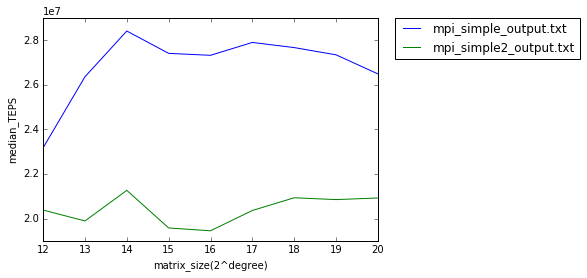

In [5]:
compare_types(['mpi_simple_output.txt','mpi_simple2_output.txt'])

### mpi_replicated в один поток и в два:

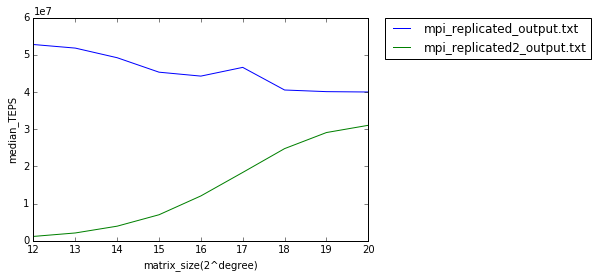

In [6]:
compare_types(['mpi_replicated_output.txt','mpi_replicated2_output.txt'])

### mpi_one_sided в один поток и в два:

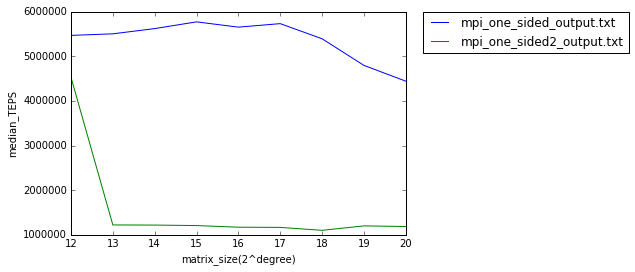

In [7]:
compare_types(['mpi_one_sided_output.txt','mpi_one_sided2_output.txt'])

### сравнение лучших реализаций с помощью mpi:

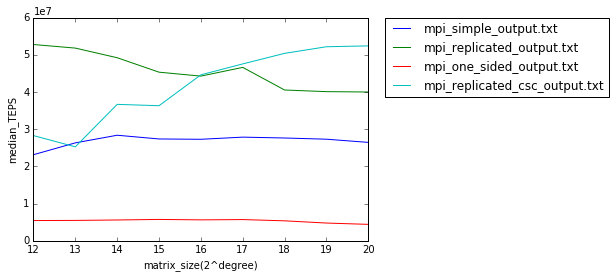

In [8]:
compare_types(['mpi_simple_output.txt','mpi_replicated_output.txt',
              'mpi_one_sided_output.txt', 'mpi_replicated_csc_output.txt'])


### Так как replicated_csc в один поток показывает себя лучше всего, его и будем сравнивать с остальными

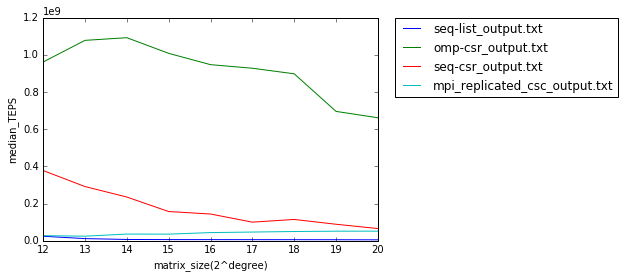

In [9]:
compare_types( ['seq-list_output.txt', 'omp-csr_output.txt',
           'seq-csr_output.txt','mpi_replicated_csc_output.txt'])


### Как видим из графика выше, openMP реализация на порядок превосходит остальные. Уберем ее из списка, чтобы детальнее поглядеть на поведение остальных:


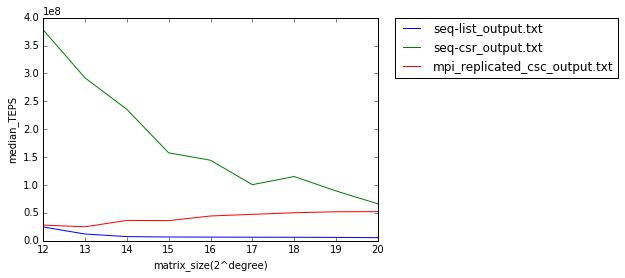

In [10]:
compare_types( ['seq-list_output.txt', 
           'seq-csr_output.txt','mpi_replicated_csc_output.txt'])


### Интересно, что последовательные реализации или слабее данной с помощью mpi, или же сильно теряют в качестве с ростом размерности. mpi же наоборот, понемногу но возрастает.

### В итоге, хотелось бы отметить, что несмотря на то, что с ростом размерности в основном большинство методов теряет в скорости(включая mpi), данный ноутбук таки смело входит в топ 200  по июньскому списку.